This notebook plots the Stable and Unstable systems, as well as whether it was predicted by XGBoost to be stable or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

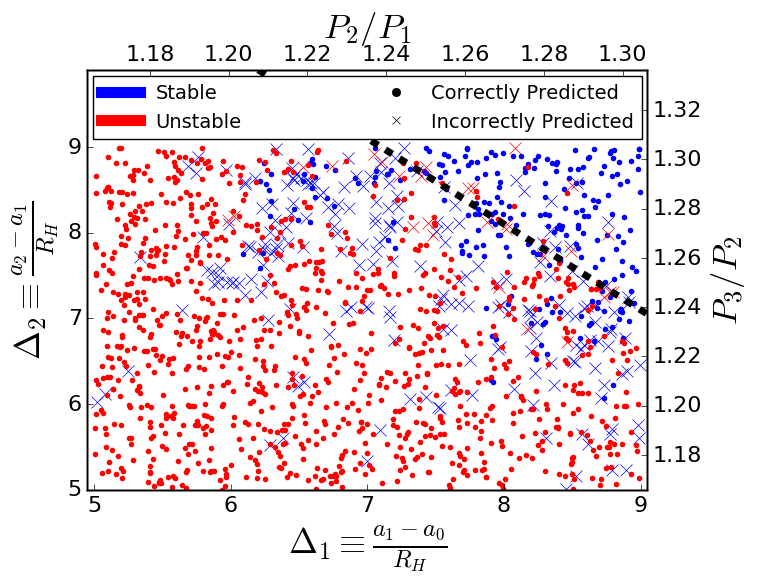

In [5]:
#This is the old data from Diana's model, i.e. not including short orbit integrations
data = pd.read_csv("ari.csv",header=0) 
RHThresh = 16.1
XGBThresh = 0.768
Stable = data[data["Stable"]==True]
Unstable = data[data["Stable"]==False]
#highlight 4002, 4283

xaxis = "daOverRH1"
yaxis = "daOverRH2"
fontsize=25
tickfontsize=16

fig, axes = plt.subplots(figsize=(8,6))
stable_pred_color="Blue"
unstable_pred_color="Red"
axes.plot(Stable[xaxis].loc[Stable["predprob"]>XGBThresh],Stable[yaxis].loc[Stable["predprob"]>XGBThresh],marker="o",markersize=4,mew=0,color=stable_pred_color,linestyle="None",label="Stable, Predicted Stable")
axes.plot(Stable[xaxis].loc[Stable["predprob"]<=XGBThresh],Stable[yaxis].loc[Stable["predprob"]<=XGBThresh],marker="x",markersize=8,color=stable_pred_color,linestyle="None",label="Stable, Predicted Unstable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]>XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]>XGBThresh],marker="x",markersize=8,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Stable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]<=XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]<=XGBThresh],marker="o",markersize=4,mew=0,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Unstable")
miny,maxy,minx,maxx = 5,9.9,4.95,9.05
axes.set_ylim([miny,maxy])
axes.set_xlim([minx,maxx])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_H}$", fontsize=fontsize)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_H}$", fontsize=fontsize) 
#leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)

blue = plt.Line2D((0,1),(0,0), color='b', linestyle='-', linewidth=8)
red = plt.Line2D((0,1),(0,0), color='r', linestyle='-', linewidth=8)
correct = plt.Line2D(range(1), range(1), color="black", marker='o', markerfacecolor="black", linestyle='')
incorrect = plt.Line2D(range(1), range(1), color="black", marker='x', markerfacecolor="black", linestyle='')
leg = axes.legend([blue, red, correct, incorrect], ['Stable', 'Unstable', 'Correctly Predicted', 'Incorrectly Predicted'], ncol=2, numpoints=1, fontsize=14, mode="expand", borderaxespad=0.3,loc='upper right')

#Lissauer et al. (2011)
x = np.arange(5,10,0.1)
axes.plot(x,RHThresh-x, 'k--', lw=5, label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

#add labels for sim_id=4002 and 4283
'''
sim_ids = [4002,4283]
plot_colors = ['red','blue']
xy = zip(data)
for i,ids in enumerate(sim_ids):
    xy = [data.loc[data["Sim_ID"]==ids,xaxis],data.loc[data["Sim_ID"]==ids,yaxis]]
    plt.plot(xy[0],xy[1],marker='x',color=plot_colors[i],mew=3, ms=10, label='')
    #plt.annotate('%d' % ids, xy=xy, textcoords='data')
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
'''

#second axes
axes2 = axes.twinx()
mn, mx = axes2.get_ylim()
lowx,highx,lowy,highy = (0.021544*minx+1)**1.5, (0.021544*maxx+1)**1.5, (0.021544*miny+1)**1.5, (0.021544*maxy+1)**1.5
axes2.set_ylim(lowy,highy)
axes2.set_ylabel('$P_3/P_2$', fontsize=fontsize)

plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)

axes3 = axes.twiny()
mn, mx = axes2.get_xlim()
axes3.set_xlim(lowx,highx)
axes3.set_xlabel('$P_2/P_1$', fontsize=fontsize)

axes.tick_params(axis='both', labelsize=tickfontsize)
axes2.tick_params(axis='both', labelsize=tickfontsize)
axes3.tick_params(axis='both', labelsize=tickfontsize)

axes.plot()
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.savefig("ICpredictions.pdf")

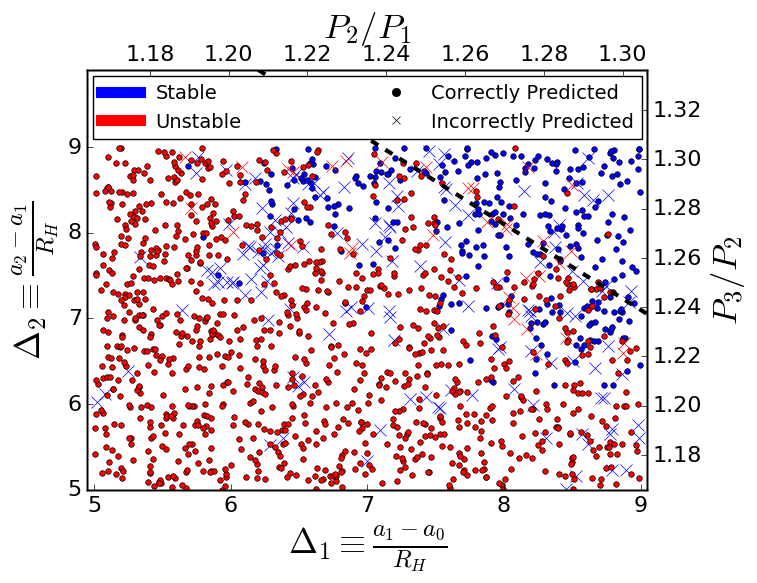

In [26]:
#This model includes the short integrations. 
data = pd.read_csv("ariSI.csv",header=0) 
RHThresh = 16.1
XGBThresh = 0.768
Stable = data[data["Stable"]==True]
Unstable = data[data["Stable"]==False]
#highlight 4002, 4283

xaxis = "daOverRH1"
yaxis = "daOverRH2"
fontsize=25
tickfontsize=16

fig, axes = plt.subplots(figsize=(8,6))
stable_pred_color="Blue"
unstable_pred_color="Red"
axes.plot(Stable[xaxis].loc[Stable["predprob"]>XGBThresh],Stable[yaxis].loc[Stable["predprob"]>XGBThresh],marker="o",markersize=4,color=stable_pred_color,linestyle="None",label="Stable, Predicted Stable")
axes.plot(Stable[xaxis].loc[Stable["predprob"]<=XGBThresh],Stable[yaxis].loc[Stable["predprob"]<=XGBThresh],marker="x",markersize=8,color=stable_pred_color,linestyle="None",label="Stable, Predicted Unstable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]>XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]>XGBThresh],marker="x",markersize=8,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Stable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]<=XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]<=XGBThresh],marker="o",markersize=4,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Unstable")
miny,maxy,minx,maxx = 5,9.9,4.95,9.05
axes.set_ylim([miny,maxy])
axes.set_xlim([minx,maxx])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_H}$", fontsize=fontsize)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_H}$", fontsize=fontsize) 
#leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)

blue = plt.Line2D((0,1),(0,0), color='b', linestyle='-', linewidth=8)
red = plt.Line2D((0,1),(0,0), color='r', linestyle='-', linewidth=8)
correct = plt.Line2D(range(1), range(1), color="black", marker='o', markerfacecolor="black", linestyle='')
incorrect = plt.Line2D(range(1), range(1), color="black", marker='x', markerfacecolor="black", linestyle='')
leg = axes.legend([blue, red, correct, incorrect], ['Stable', 'Unstable', 'Correctly Predicted', 'Incorrectly Predicted'], ncol=2, numpoints=1, fontsize=14, mode="expand", borderaxespad=0.3,loc='upper right')
#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,RHThresh-x, 'k--', lw=3, label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

#add labels for sim_id=4002 and 4283
'''
sim_ids = [4002,4283]
plot_colors = ['red','blue']
xy = zip(data)
for i,ids in enumerate(sim_ids):
    xy = [data.loc[data["Sim_ID"]==ids,xaxis],data.loc[data["Sim_ID"]==ids,yaxis]]
    plt.plot(xy[0],xy[1],marker='x',color=plot_colors[i],mew=3, ms=10, label='')
    #plt.annotate('%d' % ids, xy=xy, textcoords='data')
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
'''

#second axes
axes2 = axes.twinx()
mn, mx = axes2.get_ylim()
lowx,highx,lowy,highy = (0.021544*minx+1)**1.5, (0.021544*maxx+1)**1.5, (0.021544*miny+1)**1.5, (0.021544*maxy+1)**1.5
axes2.set_ylim(lowy,highy)
axes2.set_ylabel('$P_3/P_2$', fontsize=fontsize)

plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)

axes3 = axes.twiny()
mn, mx = axes2.get_xlim()
axes3.set_xlim(lowx,highx)
axes3.set_xlabel('$P_2/P_1$', fontsize=fontsize)

axes.tick_params(axis='both', labelsize=tickfontsize)
axes2.tick_params(axis='both', labelsize=tickfontsize)
axes3.tick_params(axis='both', labelsize=tickfontsize)

axes.plot()
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.savefig("SIpredictions.pdf")

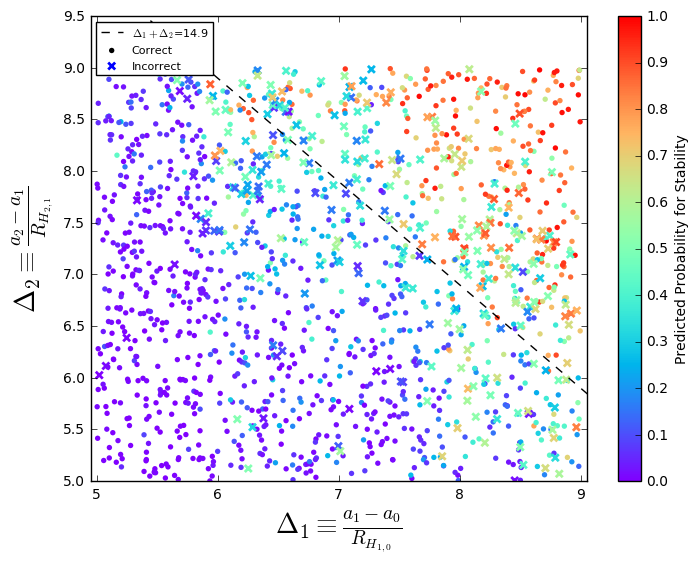

In [20]:
fig, axes = plt.subplots(figsize=(8,6))

correct_stable = Stable[Stable["predprob"]>XGBThresh]
incorrect_stable = Stable[Stable["predprob"]<=XGBThresh]
correct_unstable = Unstable[Unstable["predprob"]<=XGBThresh]
incorrect_unstable = Unstable[Unstable["predprob"]>XGBThresh]

im = axes.scatter(correct_stable["daOverRH1"],correct_stable["daOverRH2"],marker="o",s=15,lw=0,c=correct_stable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Correct")
axes.scatter(correct_unstable["daOverRH1"],correct_unstable["daOverRH2"],marker="o",s=15,lw=0,c=correct_unstable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label='')
axes.scatter(incorrect_stable["daOverRH1"],incorrect_stable["daOverRH2"],marker="x",s=25,lw=2,c=incorrect_stable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Incorrect")
axes.scatter(incorrect_unstable["daOverRH1"],incorrect_unstable["daOverRH2"],marker="x",s=25,lw=2,c=incorrect_unstable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label='')
plt.colorbar(im, label='Predicted Probability for Stability')
axes.set_ylim([5,9.5])
axes.set_xlim([4.95,9.05])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_{H_{1,0}}}$", fontsize=20)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_{H_{2,1}}}$", fontsize=20)

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,14.9-x, 'k--',label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

plt.savefig("../data/ari_correct.pdf")

In [ ]:
#log-normal Norbit_instability plots, overplot gaussian fits as well. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

thresholdsSI = np.loadtxt('../data/thresholdsSI.txt')
thresholdsIC = np.loadtxt('../data/thresholdsIC.txt')
thresholdsLM = np.loadtxt('../data/thresholdsLM.txt')
thresholdsOP = np.loadtxt('../data/thresholdsOP.txt')
recallSI = np.loadtxt('../data/recallSI.txt')
recallIC = np.loadtxt('../data/recallIC.txt')
recallLM = np.loadtxt('../data/recallLM.txt')
recallOP = np.loadtxt('../data/recallOP.txt')
precisionSI = np.loadtxt('../data/precisionSI.txt')
precisionIC = np.loadtxt('../data/precisionIC.txt')
precisionLM = np.loadtxt('../data/precisionLM.txt')
precisionOP = np.loadtxt('../data/precisionOP.txt')

thresholdsLM = (thresholdsLM - 10.)/8.
thresholdsOP = (thresholdsOP + 3.)/6.

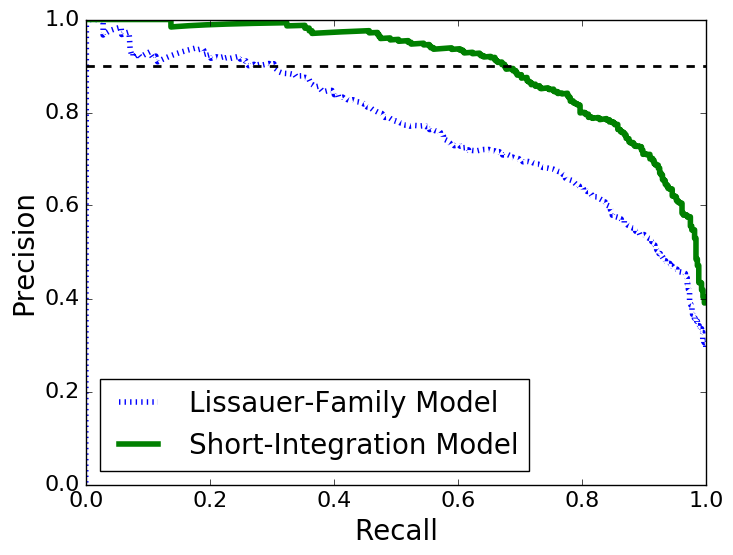

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

#im = ax.scatter(recallLM, precisionLM,marker=".",edgecolor='',s=15,lw=1,c=thresholdsLM,cmap=cm.rainbow,vmin=0,vmax=1)
#im = ax.scatter(recallIC[:-1], precisionIC[:-1],marker=".",edgecolor='',s=15,lw=1,c=thresholdsIC,cmap=cm.rainbow,vmin=0,vmax=1)
#im = ax.scatter(recallSI[:-1], precisionSI[:-1],marker=".",edgecolor='',s=15,lw=1,c=thresholdsSI,cmap=cm.rainbow,vmin=0,vmax=1)
#im = ax.scatter(recallOP, precisionOP,marker=".",edgecolor='',s=15,lw=1,c=thresholdsOP,cmap=cm.rainbow,vmin=0,vmax=1)
#ax.scatter(0.9, 0.9, marker='*', s=250, c='yellow')
#plt.colorbar(im, label='Threshold Probability for Stability')
ax.plot(recallLM, precisionLM, linestyle=':', linewidth=4, label='Lissauer-Family Model')
ax.plot(recallIC, precisionIC, linestyle='--', linewidth=4, label='Initial-Condition Model')
ax.plot(recallSI, precisionSI, linewidth=4, label='Short-Integration Model')
ax.plot(recallOP, precisionOP, linestyle='-.', linewidth=4, label='Hypothetical Optimal Model')
ax.legend(loc="lower left", fontsize=20)

ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_xlabel("Recall", fontsize=20)
ax.set_ylabel("Precision", fontsize=20)

Npts = 1000
x = np.linspace(0,1,Npts)
y = [444./1500.]*Npts # precision is positives/# of examples for a random classifier
#ax.scatter(x,y,marker=".",edgecolor='',s=15,lw=1,c=x,cmap=cm.rainbow,vmin=0,vmax=1)
ax.axhline(0.9, color='k', linestyle='--', linewidth=2)
ax.tick_params(axis='both', labelsize=tickfontsize)

plt.savefig("prcurves.pdf")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

StableSI = np.loadtxt('../data/StableSI.txt')
UnstableSI = np.loadtxt('../data/UnstableSI.txt')
StableIC = np.loadtxt('../data/StableIC.txt')
UnstableIC = np.loadtxt('../data/UnstableIC.txt')

In [35]:
StableIC.shape

(444,)

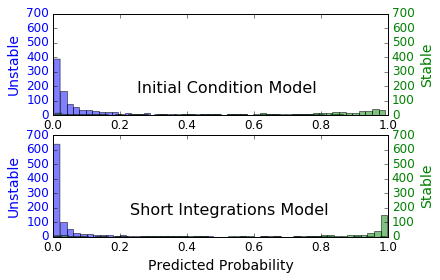

In [114]:
bins=50
tickfontsize=12
fig, axarr = plt.subplots(nrows=2)
axarr[0].hist(UnstableIC, bins, alpha=0.5, label='No', color='blue')
axarr[0].set_xlabel('Predicted Probability', fontsize=14)
axarr[0].set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in axarr[0].get_yticklabels():
    tl.set_color('blue')
    
ax2 = axarr[0].twinx()
ax2.hist(StableIC, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
axarr[0].set_ylim([0,700])
ax2.set_ylim([0,700])

ax2.annotate('Initial Condition Model', xy=[0.25, 150], textcoords='data', fontsize=16)

axarr[1].hist(UnstableSI, bins, alpha=0.5, label='No', color='blue')
axarr[1].set_xlabel('Predicted Probability', fontsize=14)
axarr[1].set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in axarr[1].get_yticklabels():
    tl.set_color('blue')
    
ax3 = axarr[1].twinx()
ax3.hist(StableSI, bins, alpha=0.5, label='Yes',color='green')
ax3.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax3.get_yticklabels():
    tl.set_color('green')
 
axarr[1].set_ylim([0,700])
ax3.set_ylim([0,700])

ax3.annotate('Short Integrations Model', xy=[0.23, 150], textcoords='data', fontsize=16)

ax3.tick_params(axis='both', labelsize=tickfontsize)
ax2.tick_params(axis='both', labelsize=tickfontsize)
axarr[0].tick_params(axis='both', labelsize=tickfontsize)
axarr[1].tick_params(axis='both', labelsize=tickfontsize)
plt.savefig("histograms.pdf")

0.338423941975 0.458251312576


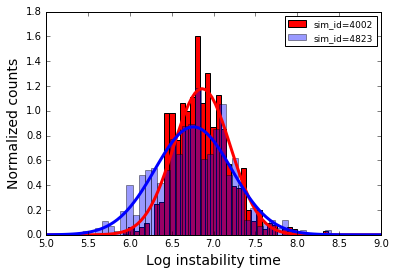

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
sim_id = 4002
#df = pd.read_csv("/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs"+str(sim_id)+'/distribution'+str(sim_id)+".csv", index_col=0)
df = pd.read_csv("../data/distribution/outputs"+str(sim_id)+'/distributionallfeatures'+str(sim_id)+".csv", index_col=0)
df.tail()

sim_id = 4283
#df2 = pd.read_csv("/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs"+str(sim_id)+'/distribution'+str(sim_id)+".csv", index_col=0)
df2 = pd.read_csv("../data/distribution/outputs"+str(sim_id)+'/distributionallfeatures'+str(sim_id)+".csv", index_col=0)
df2.tail()
logs1 = np.log10(df['Norbits_instability'].values)
logs2 = np.log10(df2['Norbits_instability'].values)

from scipy.stats import norm
import matplotlib.mlab as mlab
mu1, std1 = norm.fit(logs1)
mu2, std2 = norm.fit(logs2)
std_avg = np.mean([std1,std2])
x = np.linspace(5, 9, 100)

fontsize=14
fig, ax = plt.subplots()
ax.hist(logs1, 40, normed=True, label='sim_id=4002', color="red")
ax.hist(logs2, 40, alpha=0.4, normed=True, label='sim_id=4823', color="blue")
ax.plot(x, mlab.normpdf(x, mu1, std1), color="red", lw=3)
ax.plot(x, mlab.normpdf(x, mu2, std2), color="blue", lw=3)
ax.set_xlabel('Log instability time', fontsize=fontsize)
ax.set_ylabel('Normalized counts', fontsize=fontsize)
plt.legend(loc="upper right",fontsize=9)
print(np.std(logs1),np.std(logs2))
plt.savefig("Norbits_Instability_histogram.pdf")

In [5]:
data.head()

,Sim_ID,daOverRH1,daOverRH2,P2/P1,P3/P2,predprob,predstable,Norbits_instability,Stable
0,1648,6.879240,7.131643,1.230348,1.239099,0.761743,False,1.000000e+07,True
1,3471,8.496936,5.371167,1.286789,1.178497,0.008978,False,8.233677e+05,False
2,3849,6.822671,5.825163,1.228390,1.194028,0.000914,False,7.204145e+03,False
3,3537,5.092680,6.103170,1.169004,1.203572,0.001462,False,5.851915e+03,False
4,4214,8.928228,5.186531,1.301979,1.172200,0.029608,False,6.435885e+06,False


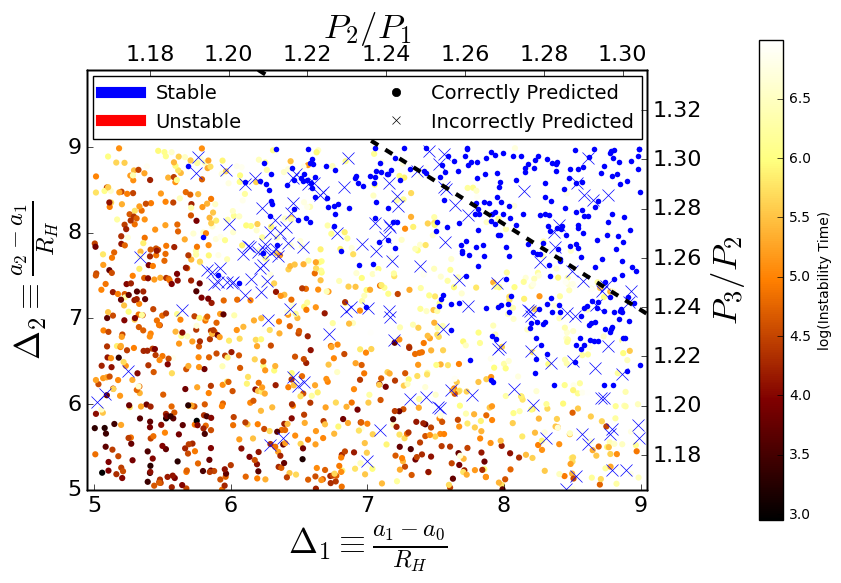

In [28]:
#Plotting a heat map of instability time as a function of the Hill spacing
import matplotlib.cm as cm

data = pd.read_csv("ariSI.csv",header=0) 
RHThresh = 16.1
XGBThresh = 0.768
Stable = data[data["Stable"]==True]
Unstable = data[data["Stable"]==False]
#highlight 4002, 4283

xaxis = "daOverRH1"
yaxis = "daOverRH2"
fontsize=25
tickfontsize=16

fig, axes = plt.subplots(figsize=(8,6))
stable_pred_color="Blue"
unstable_pred_color="Red"
axes.plot(Stable[xaxis].loc[Stable["predprob"]>XGBThresh],Stable[yaxis].loc[Stable["predprob"]>XGBThresh],marker="o",markersize=4,mew=0,color=stable_pred_color,linestyle="None",label="Stable, Predicted Stable")
axes.plot(Stable[xaxis].loc[Stable["predprob"]<=XGBThresh],Stable[yaxis].loc[Stable["predprob"]<=XGBThresh],marker="x",markersize=8,color=stable_pred_color,linestyle="None",label="Stable, Predicted Unstable")
im = axes.scatter(Unstable[xaxis],Unstable[yaxis],c=np.log10(Unstable["Norbits_instability"]),cmap=cm.afmhot,marker="o",lw=0,label="Unstable, Predicted Stable")
plt.colorbar(im, label='log(Instability Time)',cax = fig.add_axes([0.99, 0.1, 0.03, 0.8]))
#axes.plot(Unstable[xaxis].loc[Unstable["predprob"]<=XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]<=XGBThresh],marker="o",markersize=4,mew=0,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Unstable")

miny,maxy,minx,maxx = 5,9.9,4.95,9.05
axes.set_ylim([miny,maxy])
axes.set_xlim([minx,maxx])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_H}$", fontsize=fontsize)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_H}$", fontsize=fontsize) 
#leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)

blue = plt.Line2D((0,1),(0,0), color='b', linestyle='-', linewidth=8)
red = plt.Line2D((0,1),(0,0), color='r', linestyle='-', linewidth=8)
correct = plt.Line2D(range(1), range(1), color="black", marker='o', markerfacecolor="black", linestyle='')
incorrect = plt.Line2D(range(1), range(1), color="black", marker='x', markerfacecolor="black", linestyle='')
leg = axes.legend([blue, red, correct, incorrect], ['Stable', 'Unstable', 'Correctly Predicted', 'Incorrectly Predicted'], ncol=2, numpoints=1, fontsize=14, mode="expand", borderaxespad=0.3,loc='upper right')

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,RHThresh-x, 'k--', lw=3, label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

#second axes
axes2 = axes.twinx()
mn, mx = axes2.get_ylim()
lowx,highx,lowy,highy = (0.021544*minx+1)**1.5, (0.021544*maxx+1)**1.5, (0.021544*miny+1)**1.5, (0.021544*maxy+1)**1.5
axes2.set_ylim(lowy,highy)
axes2.set_ylabel('$P_3/P_2$', fontsize=fontsize)

plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)

axes3 = axes.twiny()
mn, mx = axes2.get_xlim()
axes3.set_xlim(lowx,highx)
axes3.set_xlabel('$P_2/P_1$', fontsize=fontsize)

axes.tick_params(axis='both', labelsize=tickfontsize)
axes2.tick_params(axis='both', labelsize=tickfontsize)
axes3.tick_params(axis='both', labelsize=tickfontsize)

axes.plot()
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.savefig("InstabilityTime.pdf")